In [3]:
!pip install python-dotenv


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf

import pathlib
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import sys

import dotenv

# Changer le path pour le .env pour charger les variables d'environnement
dotenv.load_dotenv('/home/cesi/datascience/.env.local')

# Changer les données dans le .enc pour le path
data_multi_path = os.environ.get('DATA_MULTI_PATH')
data_binary_path = os.environ.get('DATA_BINARY_PATH')
script_path = os.environ.get('SCRIPT_PATH')
weight_path = os.environ.get('WEIGHT_PATH')
models_path = os.environ.get('MODELS_PATH')

sys.path.insert(0, script_path)
sys.path.insert(1, models_path)

# scripts
import plotResults
import createTrainingData

# models
import resnet50
import homemade
# import vgg19
import xception
import mobilenet


2023-10-20 09:48:58.266595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-20 09:48:58.266646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-20 09:48:58.266670: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-20 09:48:58.272929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# GRRR Pawww

model_choosen = 'resnet50'
# model_choosen = 'homemade'
# model_choosen = 'vgg19'
# model_choosen = 'xception'
# model_choosen = 'mobilenet'

image_h, image_w = 400, 400
batch_size = 16
min_h = 25
min_w = 25

epochs = 15

# Si on veut faire une classification binaire ou multi
binary = True

if(binary):
    data_dir = data_binary_path
else:
    data_dir = data_multi_path


NameError: name 'data_binary_path' is not defined

In [3]:
# Alimentation des train/test set
train_set, test_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=.2,
  subset='both',
  image_size=(image_h, image_w),
  seed=42,
  batch_size=batch_size
)

class_names = train_set.class_names
num_classes = len(class_names)

Found 41398 files belonging to 2 classes.
Using 33119 files for training.
Using 8279 files for validation.


2023-10-06 07:47:12.584810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 07:47:12.589067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 07:47:12.589108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 07:47:12.589544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-06 07:47:12.589573: I tensorflow/compile

In [4]:
match(model_choosen):
    case 'resnet50':
        model = resnet50.build((image_h, image_w), num_classes)
    case 'homemade':
        model = homemade.build((image_h, image_w), num_classes)
    # case 'vgg19':
    #     model = vgg19.build((image_h, image_w), num_classes)
    case 'xception':
        model = xception.build((image_h, image_w), num_classes)
    case 'mobilenet':
        model = mobilenet.build((image_h, image_w), num_classes)

Epoch 1/15


2023-10-05 08:44:40.935222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-05 08:44:43.760692: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f11fb981b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-05 08:44:43.760734: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P4000, Compute Capability 6.1
2023-10-05 08:44:43.766107: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-05 08:44:43.860031: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1035/1035 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.8722

2023-10-05 08:47:19.486175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 1: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0001.ckpt
1035/1035 [==============================] - 185s 172ms/step - loss: 0.4373 - accuracy: 0.8722 - val_loss: 0.2127 - val_accuracy: 0.9072
Epoch 2/15
1035/1035 [==============================] - ETA: 0s - loss: 0.2371 - accuracy: 0.8981

2023-10-05 08:50:06.245966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 2: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0002.ckpt
1035/1035 [==============================] - 165s 158ms/step - loss: 0.2371 - accuracy: 0.8981 - val_loss: 0.2025 - val_accuracy: 0.9132
Epoch 3/15
1035/1035 [==============================] - ETA: 0s - loss: 0.2149 - accuracy: 0.9054

2023-10-05 08:52:52.747753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 3: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0003.ckpt
1035/1035 [==============================] - 166s 160ms/step - loss: 0.2149 - accuracy: 0.9054 - val_loss: 0.2006 - val_accuracy: 0.9170
Epoch 4/15
1035/1035 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9110

2023-10-05 08:55:36.460618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 4: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0004.ckpt
1035/1035 [==============================] - 164s 157ms/step - loss: 0.2046 - accuracy: 0.9110 - val_loss: 0.2059 - val_accuracy: 0.9132
Epoch 5/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1910 - accuracy: 0.9174

2023-10-05 08:58:21.538003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 5: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0005.ckpt
1035/1035 [==============================] - 165s 159ms/step - loss: 0.1910 - accuracy: 0.9174 - val_loss: 0.2076 - val_accuracy: 0.9144
Epoch 6/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.9190

2023-10-05 09:01:06.720852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 6: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0006.ckpt
1035/1035 [==============================] - 165s 159ms/step - loss: 0.1806 - accuracy: 0.9190 - val_loss: 0.1923 - val_accuracy: 0.9204
Epoch 7/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.9234

2023-10-05 09:03:54.802436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 7: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0007.ckpt
1035/1035 [==============================] - 168s 161ms/step - loss: 0.1748 - accuracy: 0.9234 - val_loss: 0.2060 - val_accuracy: 0.9173
Epoch 8/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1647 - accuracy: 0.9264

2023-10-05 09:06:46.352514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 8: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0008.ckpt
1035/1035 [==============================] - 173s 167ms/step - loss: 0.1647 - accuracy: 0.9264 - val_loss: 0.2030 - val_accuracy: 0.9175
Epoch 9/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1572 - accuracy: 0.9289

2023-10-05 09:09:43.885025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 9: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0009.ckpt
1035/1035 [==============================] - 177s 170ms/step - loss: 0.1572 - accuracy: 0.9289 - val_loss: 0.2121 - val_accuracy: 0.9165
Epoch 10/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1479 - accuracy: 0.9323

2023-10-05 09:12:33.080089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 10: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0010.ckpt
1035/1035 [==============================] - 167s 161ms/step - loss: 0.1479 - accuracy: 0.9323 - val_loss: 0.2008 - val_accuracy: 0.9187
Epoch 11/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9369

2023-10-05 09:15:18.544482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 11: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0011.ckpt
1035/1035 [==============================] - 166s 160ms/step - loss: 0.1399 - accuracy: 0.9369 - val_loss: 0.2118 - val_accuracy: 0.9199
Epoch 12/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1373 - accuracy: 0.9367

2023-10-05 09:18:06.323836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 12: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0012.ckpt
1035/1035 [==============================] - 167s 160ms/step - loss: 0.1373 - accuracy: 0.9367 - val_loss: 0.2236 - val_accuracy: 0.9191
Epoch 13/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9389

2023-10-05 09:20:51.942306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 13: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0013.ckpt
1035/1035 [==============================] - 166s 160ms/step - loss: 0.1300 - accuracy: 0.9389 - val_loss: 0.2732 - val_accuracy: 0.9182
Epoch 14/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9424

2023-10-05 09:23:38.051681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 14: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0014.ckpt
1035/1035 [==============================] - 167s 160ms/step - loss: 0.1233 - accuracy: 0.9424 - val_loss: 0.2435 - val_accuracy: 0.9222
Epoch 15/15
1035/1035 [==============================] - ETA: 0s - loss: 0.1219 - accuracy: 0.9416

2023-10-05 09:26:23.933857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9



Epoch 15: saving model to /tf/dataset/livrable1/weight/2023_10_05_08_44_36/cp-0015.ckpt
1035/1035 [==============================] - 165s 159ms/step - loss: 0.1219 - accuracy: 0.9416 - val_loss: 0.2731 - val_accuracy: 0.9196


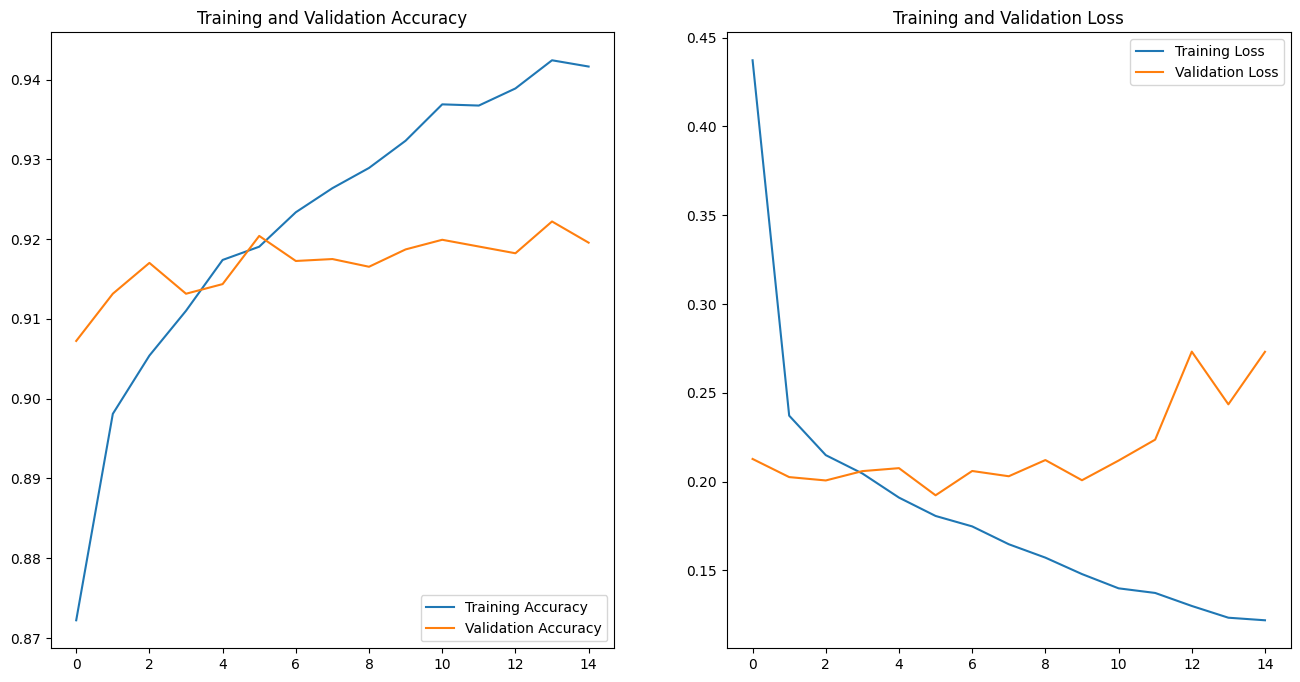

In [5]:
path = createTrainingData.create_training_data(weight_path, model, model_choosen, num_classes, image_h, image_w, batch_size)

checkpoint_path = path+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

weights_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

history = model.fit(train_set, epochs=epochs, validation_data=test_set, callbacks=[weights_callback])

epochs_range = range(epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(path+"/metrics.png")

plt.show()



In [5]:
# Load de la meilleur epoch

# A decommenter seulement si on souhaite charger des poids

model_to_load_path = weight_path+"homemade_binary/cp-0015.ckpt"

model.load_weights(model_to_load_path)

In [6]:
predictions = model.predict(test_set)

2023-10-06 07:47:16.354531: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


 97/259 [==========>...................] - ETA: 20s

2023-10-06 07:47:29.334793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/259 [===========================>..] - ETA: 1s

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


259/259 [==============================] - 35s 131ms/step


In [7]:
loss, acc = model.evaluate(test_set)

 97/259 [==========>...................] - ETA: 20s - loss: 0.1872 - accuracy: 0.9285

2023-10-06 07:48:03.951775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


248/259 [===========================>..] - ETA: 1s - loss: 0.1993 - accuracy: 0.9239

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


259/259 [==============================] - 34s 130ms/step - loss: 0.1986 - accuracy: 0.9241


In [8]:
full_tests_images = []
full_tests_labels = []
for i,(batch_images, batch_labels) in enumerate(test_set):
    for im in batch_images:
        full_tests_images.append(im)
    for res in batch_labels:
        full_tests_labels.append(int(res))

2023-10-06 07:48:38.832339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


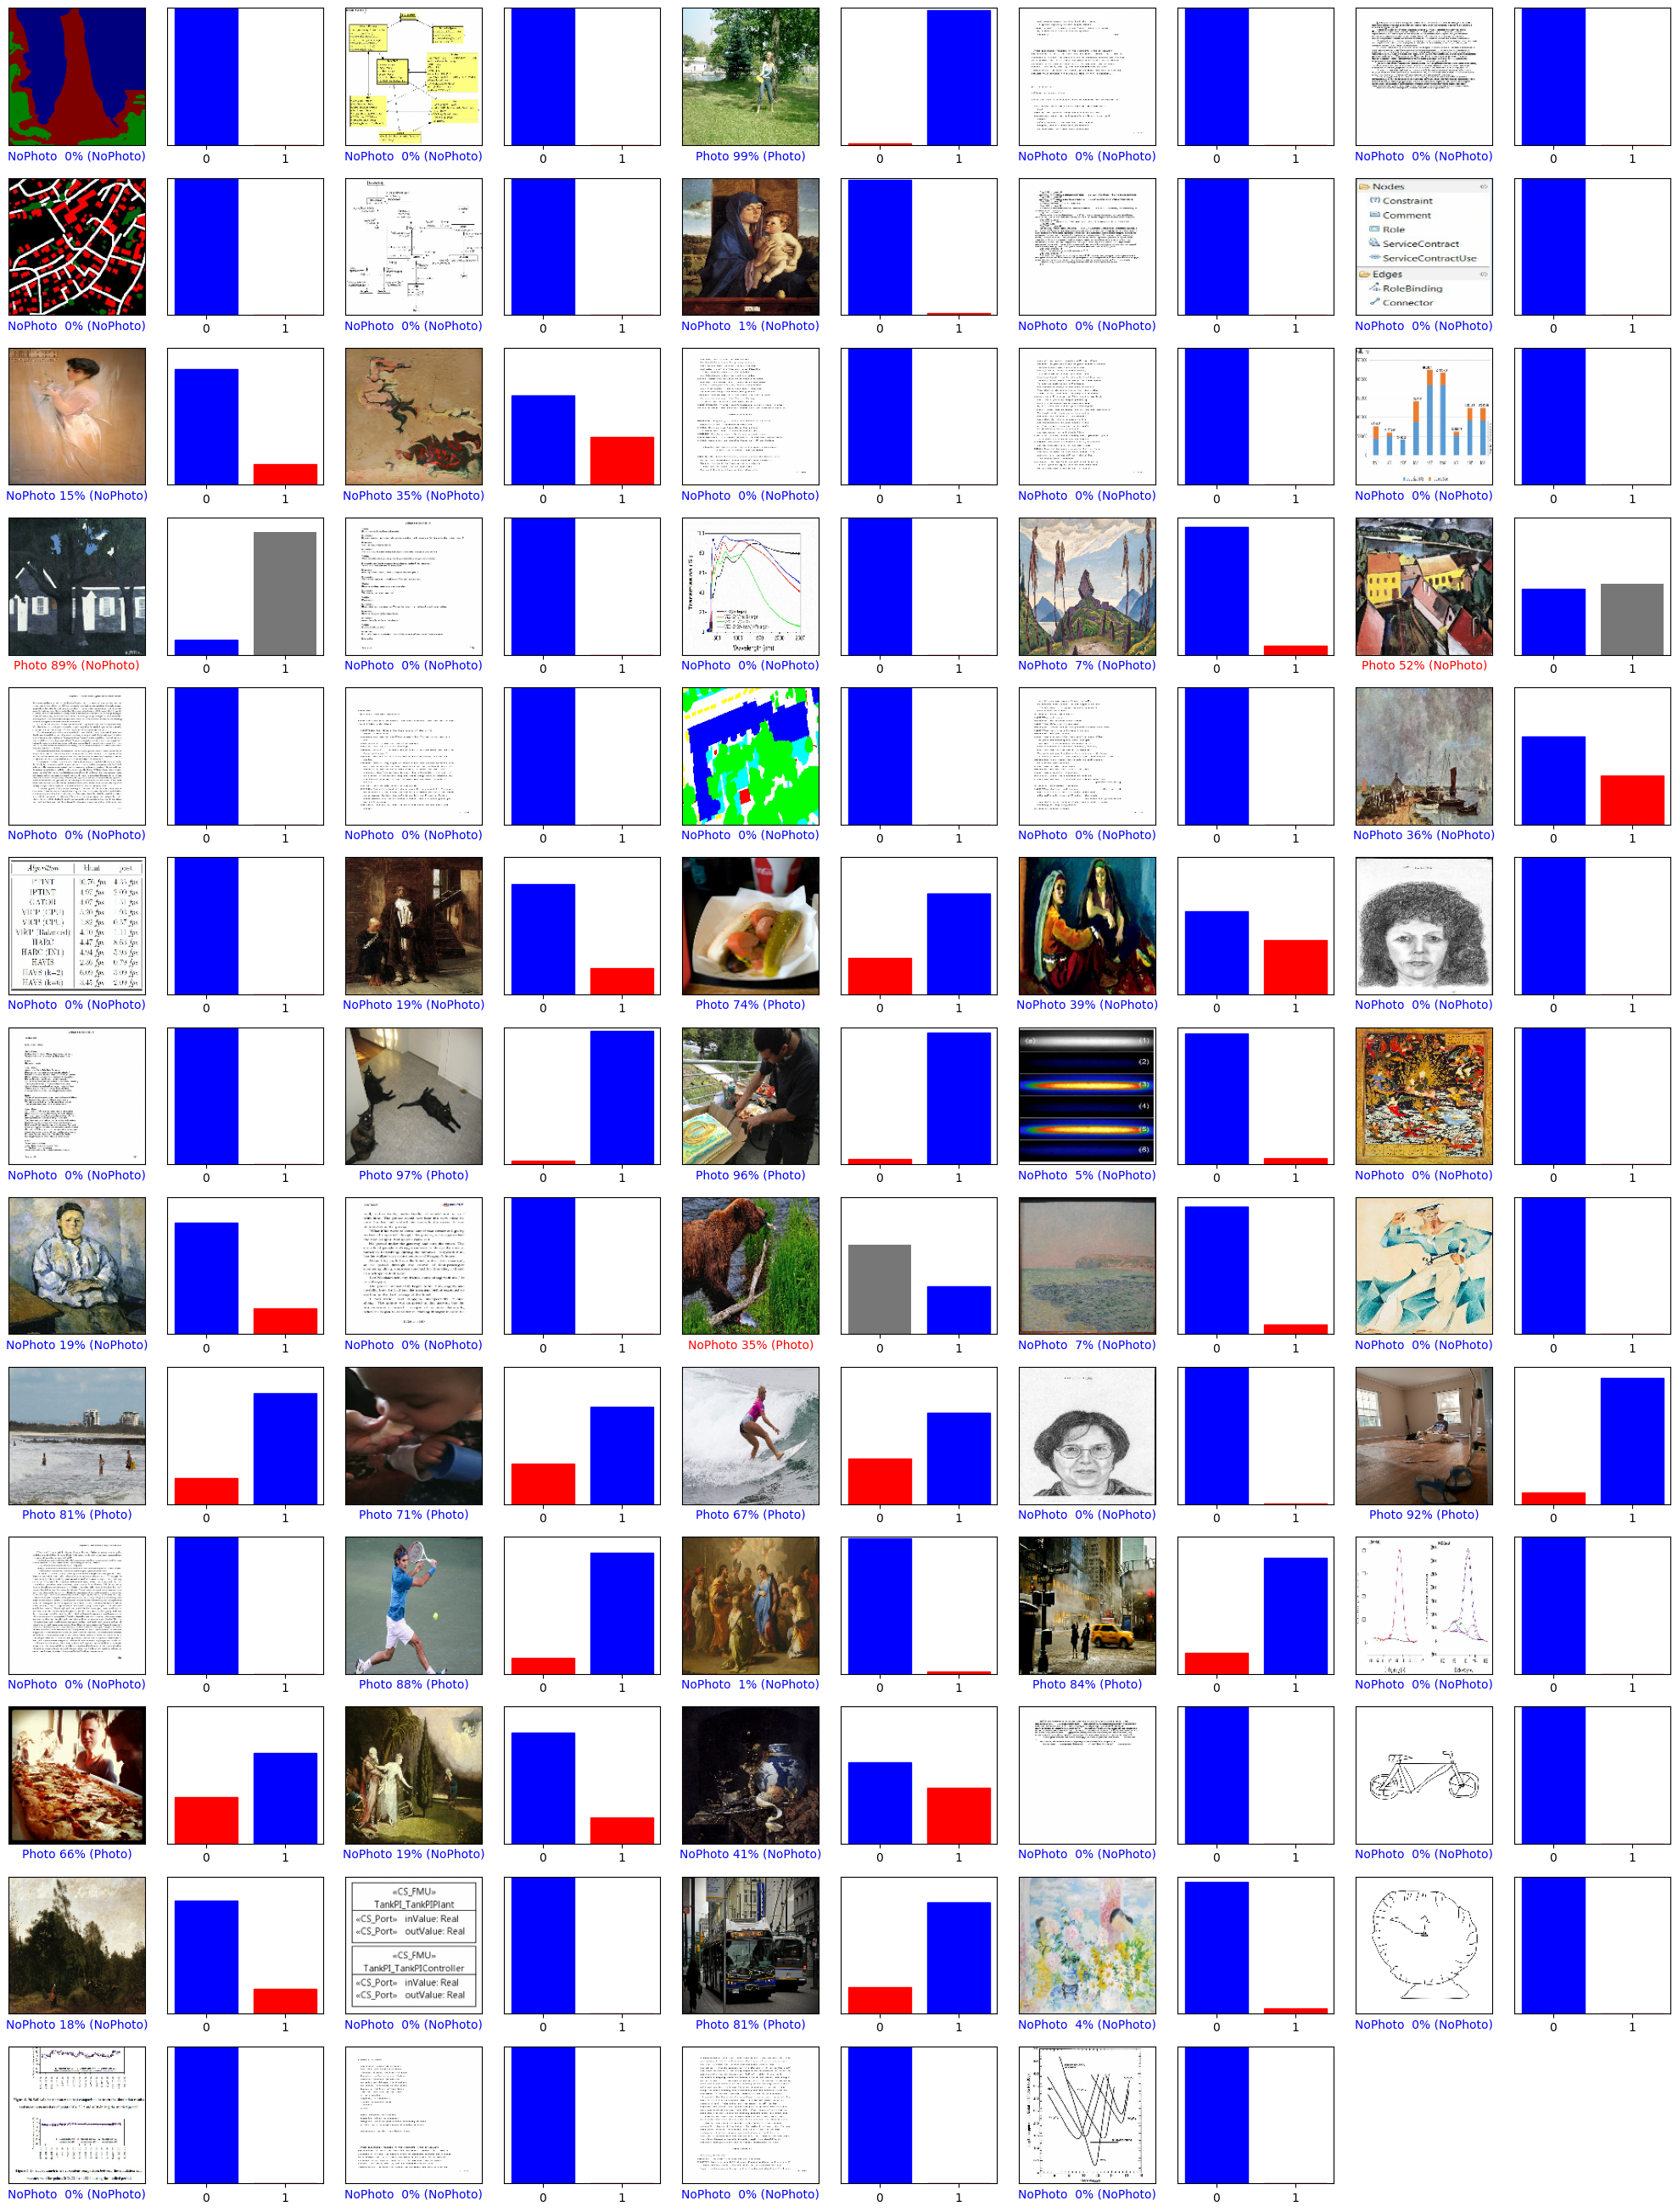

In [24]:
plotResults.plot_results(num_classes == 2, predictions, full_tests_labels, full_tests_images, class_names, path)

In [48]:
tp = 0
fp = 0
fn = 0
tn = 0
default_class_name = 'Photo'

for i in range(len(predictions)):
    if binary:
        predicted_label = np.where(predictions[i][0] < 0.5, 'Non-photo', 'Photo')
    else:
        predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[full_tests_labels[i]]
    if(not binary):
        if true_label == 'Photo' and predicted_label == 'Photo':
            tp += 1
        elif true_label == 'Photo' and predicted_label != 'Photo':
            fn += 1
        elif true_label != 'Photo' and predicted_label == 'Photo':
            fp += 1
        elif true_label != 'Photo' and predicted_label != 'Photo':
            tn += 1
    else:
        if true_label == default_class_name and predicted_label == default_class_name:
            tp += 1
        elif true_label == default_class_name and predicted_label != default_class_name:
            fn += 1
        elif true_label != 'Photo' and predicted_label == 'Photo':
            fp += 1
        elif true_label != 'Photo' and predicted_label != 'Photo':
            tn += 1

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("True positif: ", tp)
print("False positif: ", fp)
print("False negatif: ", fn)
print("True negatif: ", tn)
print('-------------------------------')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("Accuracy: ", accuracy)
print('-------------------------------')
print("Confusion Matrix : ")
print(f"[{tp}] [{fp}]")
print(f"[{fn}] [{tn}]")


# Save all the metrics in a txt file
f = open(path+"/metrics.txt", "w")
f.write("True positif: "+str(tp)+"\n")
f.write("False positif: "+str(fp)+"\n")
f.write("False negatif: "+str(fn)+"\n")
f.write("True negatif: "+str(tn)+"\n")
f.write('-------------------------------\n')
f.write("Precision: "+str(precision)+"\n")
f.write("Recall: "+str(recall)+"\n")
f.write("F1: "+str(f1)+"\n")
f.write("Accuracy: "+str(accuracy)+"\n")
f.write('-------------------------------\n')
f.write("Confusion Matrix : \n")
f.write(f"[{tp}] [{fp}]\n")
f.write(f"[{fn}] [{tn}]\n")
f.close()

True positif:  1511
False positif:  199
False negatif:  429
True negatif:  6140
-------------------------------
Precision:  0.8836257309941521
Recall:  0.7788659793814433
F1:  0.827945205479452
Accuracy:  0.9241454281918106
-------------------------------
Confusion Matrix : 
[1511] [199]
[429] [6140]
